In [98]:
# -*- coding:utf-8 -*-
# 首先加载必用的库
import tensorflow as tf
import numpy as np
# import gensim  用来加载预训练word vector
from gensim.models import KeyedVectors
import jieba
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings("ignore")

In [99]:
# 使用gensim加载预训练中文分词embedding, 有可能需要等待1-2分钟
cn_model = KeyedVectors.load_word2vec_format('../embeddings/sgns.zhihu.bigram',binary=False, unicode_errors="ignore")

W0711 09:22:06.416603  6504 utils_any2vec.py:185] duplicate word '--------------------------------------------------------------------------------------------------' in ../embeddings/sgns.zhihu.bigram, ignoring all but first
W0711 09:22:11.286582  6504 utils_any2vec.py:185] duplicate word '--------------------------------------------------------------------------------------------------' in ../embeddings/sgns.zhihu.bigram, ignoring all but first
W0711 09:22:22.673138  6504 utils_any2vec.py:185] duplicate word '--------------------------------------------------------------------------------------------------' in ../embeddings/sgns.zhihu.bigram, ignoring all but first
W0711 09:22:30.453337  6504 utils_any2vec.py:185] duplicate word '--------------------------------------------------------------------------------------------------' in ../embeddings/sgns.zhihu.bigram, ignoring all but first
W0711 09:22:33.003519  6504 utils_any2vec.py:185] duplicate word '----------------------------------

W0711 09:22:42.076260  6504 utils_any2vec.py:185] duplicate word '--------------------------------------------------------------------------------------------------' in ../embeddings/sgns.zhihu.bigram, ignoring all but first
W0711 09:22:42.093215  6504 utils_any2vec.py:185] duplicate word '..................................................................................................' in ../embeddings/sgns.zhihu.bigram, ignoring all but first
W0711 09:22:42.098202  6504 utils_any2vec.py:185] duplicate word '--------------------------------------------------------------------------------------------------' in ../embeddings/sgns.zhihu.bigram, ignoring all but first
W0711 09:22:42.112165  6504 utils_any2vec.py:185] duplicate word '..................................................................................................' in ../embeddings/sgns.zhihu.bigram, ignoring all but first
W0711 09:22:42.113162  6504 utils_any2vec.py:185] duplicate word '----------------------------------

In [100]:
# 由此可见每一个词都对应一个长度为300的向量
embedding_dim = cn_model['山东大学'].shape[0]
embedding_dim

300

In [101]:
# 获得样本的索引
import pandas as pd

data_neg = pd.read_excel('../data/neg9.xlsx')
# data_pos = pd.read_excel('../data/pos.xls')

print('样本总数：'+str(len(data_neg)))

样本总数：10526


In [102]:
data_neg.head(1)

,lable,data
0,1,做为一本声名在外的流行书，说的还是广州的外企，按道理应该和我的生存环境差不多啊。但是一看之下...


In [103]:
# 将所有的评价内容放置到一个list里
train_texts_orig = []
# 文本所对应的labels，也就是标记
train_target = []

for indexs in data_neg.index:
    train_texts_orig.append(data_neg.loc[indexs].values[1])
    train_target.append(data_neg.loc[indexs].values[0]-1)

In [104]:
print(len(train_texts_orig))
# print(train_target)
train_texts_orig[3824]

10526


'明明在携程上用信用卡担保定了房，入住时居然前台说没有此信息，而且房间已经住满了，打电话到携程投诉，说是酒店预订部与前台没沟通好，折腾了半天，非常气人!'

In [105]:
train_target

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 3,
 1,
 1,
 0,
 3,
 0,
 2,
 0,
 3,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 0,
 3,
 0,
 1,
 3,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [106]:
type(train_texts_orig)

list

In [107]:
# for indexs in data_pos.index:
#     train_texts_orig.append(data_pos.loc[indexs].values[0])
#     train_target.append("0")

In [108]:
# print(len(train_texts_orig))
# # print(train_target)
# train_texts_orig[3856]

In [109]:
# 使用tensorflow的keras接口来建模
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, GRU, Embedding, LSTM, Bidirectional
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

In [110]:
# 进行分词和tokenize
# train_tokens是一个长长的list，其中含有7909个小list，对应每一条评价
train_tokens = []
for text in train_texts_orig:
    # 去掉标点
    text = str(text)
    text = re.sub("[\s+\.\!\/_,$%^*(+\"\']+|[+——！，。？、~@#￥%……&*（） ]+", "",text)
    # 结巴分词
    cut = jieba.cut(text)
    # 结巴分词的输出结果为一个生成器
    # 把生成器转换为list
    cut_list = [ i for i in cut ]
    for i, word in enumerate(cut_list):
        try:
            # 将词转换为索引index
            cut_list[i] = cn_model.vocab[word].index
        except KeyError:
            # 如果词不在字典中，则输出0
            cut_list[i] = 0
    train_tokens.append(cut_list)

In [111]:
# 获得所有tokens的长度
num_tokens = [ len(tokens) for tokens in train_tokens ]
num_tokens = np.array(num_tokens)
print("num_tokens:",num_tokens)
# print(train_tokens)
len(train_tokens)
print(len(num_tokens))

num_tokens: [76 34 33 ...  4  4  3]
10526


In [112]:
# 平均tokens的长度
print(np.mean(num_tokens))

53.46817404522135


In [113]:
# 最长的评价tokens的长度
print(np.max(num_tokens))

1085


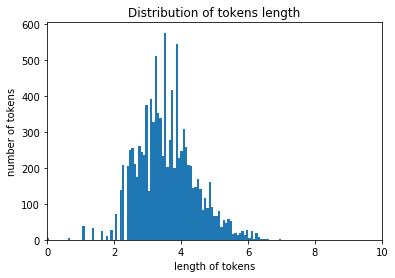

In [114]:
plt.hist(np.log(num_tokens), bins = 100)
plt.xlim((0,10))
plt.ylabel('number of tokens')
plt.xlabel('length of tokens')
plt.title('Distribution of tokens length')
plt.show()

In [115]:
# 取tokens平均值并加上两个tokens的标准差，
# 假设tokens长度的分布为正态分布，则max_tokens这个值可以涵盖95%左右的样本
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

184

In [116]:
# 取tokens的长度为223时，大约96%的样本被涵盖
# 我们对长度不足的进行padding，超长的进行修剪
np.sum( num_tokens < max_tokens ) / len(num_tokens)

0.9595287858635759

In [117]:
# 用来将tokens转换为文本
def reverse_tokens(tokens):
    text = ''
    for i in tokens:
        if i != 0:
            text = text + cn_model.index2word[i]
        else:
            text = text + ' '
    return text

In [118]:
cn_model.index2word[120]

'再'

In [119]:
train_tokens[0]

[59,
 69,
 0,
 154664,
 1,
 2010,
 473,
 16,
 1,
 57,
 2537,
 1,
 11119,
 649,
 1305,
 144,
 5,
 6,
 1,
 19945,
 869,
 90,
 86,
 197235,
 126,
 155,
 39283,
 22,
 18,
 711,
 3,
 40,
 155,
 574,
 1,
 87,
 1946,
 8,
 34,
 655,
 1,
 644,
 4253,
 18,
 38,
 16,
 143,
 13176,
 78,
 49,
 0,
 51,
 27,
 135,
 29865,
 391,
 18,
 711,
 3,
 91,
 51,
 202,
 39,
 11119,
 4862,
 122,
 62,
 441,
 1,
 188009,
 691,
 613,
 4,
 374,
 7294,
 79]

In [120]:
reverse = reverse_tokens(train_tokens[0])
reverse

'做为 声名在外的流行书说的还是广州的外企按道理应该和我的生存环境差不多啊但是一看之下才发现相去甚远这也就算了还发现其中的很多规则有很强的企业个性也就说只是个例而不是 给我们这些老油条看看也就算了如果给那些对外企向往或者想了解的freshman来看实在是容易误导他们'

In [121]:
# 只使用前50000个词
num_words = 50000
# 初始化embedding_matrix，之后在keras上进行应用
embedding_matrix = np.zeros((num_words, embedding_dim))
embedding_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [122]:
# embedding_matrix为一个 [num_words，embedding_dim] 的矩阵
# 维度为 50000 * 300
for i in range(num_words):
    embedding_matrix[i,:] = cn_model[cn_model.index2word[i]]
embedding_matrix = embedding_matrix.astype('float32')
embedding_matrix

array([[-8.017840e-01, -1.653400e-01,  3.050800e-02, ...,  1.065250e-01,
         5.534360e-01,  4.366500e-01],
       [-6.517470e-01,  5.359700e-01,  3.402710e-01, ...,  8.053990e-01,
         1.045930e-01,  1.936940e-01],
       [-4.123210e-01,  2.282610e-01,  2.071140e-01, ...,  8.087770e-01,
         5.675100e-02,  4.523740e-01],
       ...,
       [ 5.849840e-01,  1.121180e-01, -6.938330e-01, ..., -3.760570e-01,
         1.203500e-01, -1.059511e+00],
       [ 1.511710e-01, -3.200000e-04, -3.885760e-01, ..., -5.988550e-01,
         4.273530e-01, -3.922630e-01],
       [-4.536090e-01, -1.813600e-02, -1.306600e-01, ..., -6.608000e-02,
         3.566680e-01,  3.898050e-01]], dtype=float32)

In [123]:
# 检查index是否对应，
# 输出300意义为长度为300的embedding向量一一对应
np.sum(cn_model[cn_model.index2word[30]] == embedding_matrix[30])

300

In [124]:
# embedding_matrix的维度，
# 这个维度为keras的要求，后续会在模型中用到
print("embedding_matrix.shape", embedding_matrix.shape)

embedding_matrix.shape (50000, 300)


In [125]:
# 进行padding和truncating， 输入的train_tokens是一个list
# 返回的train_pad是一个numpy array
train_pad = pad_sequences(train_tokens, maxlen=max_tokens, padding='pre', truncating='pre')
train_pad[33]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [126]:
# 超出五万个词向量的词用0代替
train_pad[train_pad >= num_words] = 0

In [127]:
# 可见padding之后前面的tokens全变成0，文本在最后面
print("train_pad[33]", train_pad[33])

train_pad[33] [    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0 18229     1   832    18   447  1357   421
  1148  9827     1  8108     1    34 

In [128]:
# 准备target向量
train_target = np.array(train_target)
train_target

array([0, 0, 0, ..., 5, 5, 5], dtype=int64)

In [129]:
# 进行训练和测试样本的分割
from sklearn.model_selection import train_test_split

In [130]:
from tensorflow.python.keras.utils import to_categorical
""" one-hot处理标签 """
train_target = to_categorical(train_target)

In [131]:
train_target.shape

(10526, 9)

In [132]:
# 90%的样本用来训练，剩余10%用来测试
X_train, X_test, y_train, y_test = train_test_split(train_pad, train_target, test_size=0.15, random_state=1000)

In [133]:
# def vectorize_sequences(squences, dimension=10):
#     """
#     @函数功能:将序列向量化，初始化全0的序列，在单词索引对应的位置上置1
#     """
#     resluts = np.zeros((len(squences), dimension))
#     for i, sequence in enumerate(squences):
#         resluts[i, sequence] = 1
#     return resluts

# X_train = vectorize_sequences(X_train)
# X_test = vectorize_sequences(X_test)

In [134]:
# 查看训练样本，确认无误
print(reverse_tokens(X_train[30]))
print('class: ', y_train[30])

                                                                                                                                              帮朋友买的他家小朋友应该会喜欢吧纸张的质量相比在书城里看的要差点不过价格要便宜些嘛还要提出来的就是等了好久快递的速度真的不咋样啊
class:  [0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [135]:
# 用LSTM对样本进行分类
model = Sequential()

In [136]:
# 模型第一层为embedding
model.add(Embedding(num_words, embedding_dim, weights=[embedding_matrix], input_length=max_tokens, trainable=False))

# model.add(Bidirectional(LSTM(units=64, return_sequences=True)))
# model.add(LSTM(units=16, return_sequences=False))
model.add(LSTM(units=32, return_sequences=False))

model.add(Dense(9, activation='softmax'))

In [137]:
# 我们使用adam以0.001的learning rate进行优化
optimizer = Adam(lr=1e-3)

model.compile(loss='categorical_crossentropy', optimizer=optimizer,  metrics=['accuracy'])

In [138]:
# 我们来看一下模型的结构，一共90k左右可训练的变量
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 184, 300)          15000000  
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                42624     
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 297       
Total params: 15,042,921
Trainable params: 42,921
Non-trainable params: 15,000,000
_________________________________________________________________


In [139]:
# 建立一个权重的存储点
path_checkpoint = 'sentiment_checkpoint_Class9_V1.0.keras'
checkpoint = ModelCheckpoint(filepath=path_checkpoint, monitor='val_loss', verbose=1, save_weights_only=True, save_best_only=True)

# 尝试加载已训练模型
try:
    model.load_weights(path_checkpoint)
except Exception as e:
    print(e)

In [140]:
# 定义early stoping如果3个epoch内validation loss没有改善则停止训练
earlystopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

In [141]:
# 自动降低learning rate
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=1e-8, patience=0, verbose=1)

In [142]:
# 定义callback函数
callbacks = [
    earlystopping,
    checkpoint,
    lr_reduction
]

In [148]:
# 开始训练
history = model.fit(X_train, y_train,
          validation_split=0.2,
          epochs=20,
          batch_size=128,
          callbacks=callbacks)

Train on 7157 samples, validate on 1790 samples
Epoch 1/20
7040/7157 [============================>.] - ETA: 0s - loss: 0.0915 - acc: 0.9682
Epoch 00001: val_loss improved from 0.27072 to 0.19325, saving model to sentiment_checkpoint_Class9_V1.0.keras
7157/7157 [==============================] - 33s 5ms/sample - loss: 0.0914 - acc: 0.9683 - val_loss: 0.1933 - val_acc: 0.9291
Epoch 2/20
7040/7157 [============================>.] - ETA: 0s - loss: 0.0915 - acc: 0.9686
Epoch 00002: val_loss did not improve from 0.19325
7157/7157 [==============================] - 39s 5ms/sample - loss: 0.0914 - acc: 0.9683 - val_loss: 0.1933 - val_acc: 0.9291
Epoch 3/20
7040/7157 [============================>.] - ETA: 0s - loss: 0.0914 - acc: 0.9680
Epoch 00003: val_loss did not improve from 0.19325
7157/7157 [==============================] - 33s 5ms/sample - loss: 0.0914 - acc: 0.9683 - val_loss: 0.1933 - val_acc: 0.9291
Epoch 4/20
7040/7157 [============================>.] - ETA: 0s - loss: 0.0922 - a

In [149]:
# 开始测试
result = model.evaluate(X_test, y_test)
print('Accuracy:{0:.2%}'.format(result[1]))

1579/1579 [==============================] - 4s 2ms/sample - loss: 0.2446 - acc: 0.9120
Accuracy:91.20%


In [150]:
model.save('my_model9.h5')

In [55]:
history.history

{'loss': [0.200107738538055,
  0.19969674650808275,
  0.19925683958147464,
  0.19865159010808067,
  0.19859221115182346,
  0.1985863287339869,
  0.1985860960273431],
 'acc': [0.93117744,
  0.9315328,
  0.93117744,
  0.93200666,
  0.93200666,
  0.93200666,
  0.93200666],
 'val_loss': [0.32087333194110085,
  0.32065054122061015,
  0.32096215781058496,
  0.32093525992922634,
  0.3209306509794392,
  0.3209310137171842,
  0.32093077793288916],
 'val_acc': [0.88178915,
  0.8828541,
  0.88178915,
  0.88178915,
  0.88178915,
  0.88178915,
  0.88178915],
 'lr': [1.0000001e-05,
  1.0000001e-05,
  1.0000001e-05,
  1.0000001e-06,
  1.0000001e-07,
  1.0000001e-08,
  1e-08]}

In [56]:
def show_acc(history):
    """ 绘制精度曲线 """
    plt.clf()
    history_dict = history.history
    acc = history_dict['acc']
    val_acc = history_dict['val_acc']

    epochs = range(1, len(val_acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('Acc')
    plt.legend()

    plt.show()

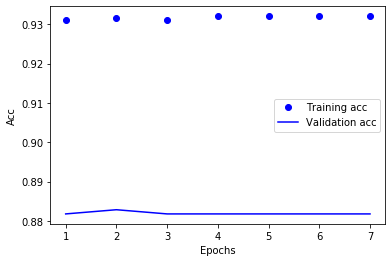

In [57]:
""" show result """
show_acc(history)

In [54]:
def predict_sentiment(text):
    print(text)
    # 去标点
    text = re.sub("[\s+\.\!\/_,$%^*(+\"\']+|[+——！，。？、~@#￥%……&*（）]+", "",text)
    # 分词
    cut = jieba.cut(text)
    cut_list = [ i for i in cut ]
    # tokenize
    for i, word in enumerate(cut_list):
        try:
            cut_list[i] = cn_model.vocab[word].index
            if cut_list[i] >= 50000:
                cut_list[i] = 0
        except KeyError:
            cut_list[i] = 0
    # padding
    tokens_pad = pad_sequences([cut_list], maxlen=max_tokens, padding='pre', truncating='pre')
    # 预测
    result = model.predict(x=tokens_pad)
    num = np.argmax(result)
    num += 1
    if num >= 0 and num < 9:
        print('负面评价  %d' % num, 'output=%.2f' % result[0][num])
    else:
        print('error!!!')

In [55]:
test_list = [
    '酒店设施不是新的，服务态度很不好',
    '酒店卫生条件非常不好',
    '床铺非常舒适',
    '房间很凉，不给开暖气',
    '房间很凉爽，空调冷气很足',
    '酒店环境不好，住宿体验很不好',
    '房间隔音不到位' ,
    '晚上回来发现没有打扫卫生',
    '因为过节所以要我临时加钱，比团购的价格贵'
]
for text in test_list:
    predict_sentiment(text)

酒店设施不是新的，服务态度很不好
负面评价  3 output=0.01
酒店卫生条件非常不好
负面评价  7 output=0.05
床铺非常舒适
负面评价  7 output=0.05
房间很凉，不给开暖气
负面评价  7 output=0.07
房间很凉爽，空调冷气很足
负面评价  7 output=0.04
酒店环境不好，住宿体验很不好
负面评价  6 output=0.23
房间隔音不到位
负面评价  7 output=0.04
晚上回来发现没有打扫卫生
负面评价  6 output=0.14
因为过节所以要我临时加钱，比团购的价格贵
负面评价  6 output=0.14


In [98]:
y_pre = model.predict("")

AttributeError: 'str' object has no attribute 'shape'

In [92]:
y_pred = model.predict(X_test)
# print(y_pred)
y_pred = y_pred.T[0]
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]
y_pred = np.array(y_pred)

y_actual = np.array(y_test)

In [93]:
# 找出错误分类的索引
misclassified = np.where( y_pred != y_actual )[0]

# 输出所有错误分类的索引
len(misclassified)

1

In [94]:
misclassified[0]

0

In [95]:
# 我们来找出错误分类的样本看看
idx = misclassified[0]
print(reverse_tokens(X_test[idx]))
print('预测的分类', y_pred[idx])
print('实际的分类', y_actual[idx])

                                                                                                                                                     一个字--差4星收费0星service大堂 小孩当 小便--没人管向前 纸记号码头也不看就说没电视不能看说是电视公司在修不知当天会不会好早上吃早饭 去连坐的地方也没有别说吃的了住了2晚但酒店告诉 我只住了 该 的)   
预测的分类 0
实际的分类 [0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
idx = 1
print(reverse_tokens(X_test[idx]))
print('预测的分类', y_pred[idx])
print('实际的分类', y_actual[idx])